<h1>Separación de Variables en Cartesianas</h1>


Este código plotea las superficies de nivel de 

$$\Phi(x,y,z) = \frac{16V}{\pi^2}\sum_{m=1}^\infty\sum_{n=1}^\infty \sin(\frac{n\pi}{a}x) \sin(\frac{m\pi}{b}y)\sinh(\gamma_{mn}(a-z))\frac{1}{mn\sinh(\gamma_{mn}a)}$$

con $\gamma_{mn}=\sqrt{k_n^2+k_m^2}$, $k_n=\frac{n\pi}{a}, k_m=\frac{m\pi}{b}$, para valores de $z$ constante.

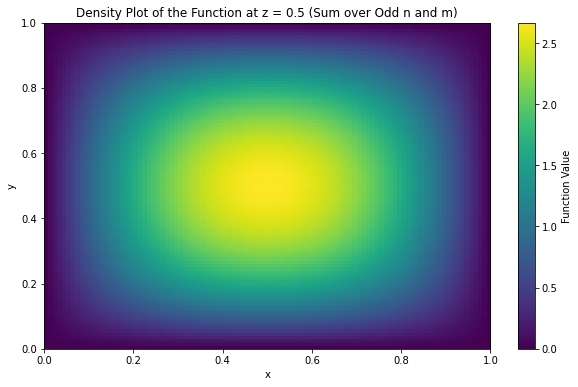

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
a = 1.0
b = 1.0
c = 1.0
V = 16
A = 16*V/np.pi**2
# Create a grid of x and y values
x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)

# Choose a constant value of z for the density plot (between 0 and c)
z_constant = 0.5

# Calculate the function values for the given z
n_values = np.arange(1, 100, 2)  # Odd values of n
m_values = np.arange(1, 100, 2)  # Odd values of m
Z = np.zeros_like(X)

for n in n_values:
    for m in m_values:
        kn = n * np.pi / a
        km = m * np.pi / b
        gamma = np.sqrt(kn**2 + km**2)
        Z += A*(1 / (n * m)) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b) * \
             np.sinh(gamma * (c - z_constant)) / np.sinh(gamma * c)

# Create a density plot
plt.figure(figsize=(10, 6))
density_plot = plt.imshow(Z, extent=(0, a, 0, b), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(density_plot, label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Density Plot of the Function at z = {z_constant} (Sum over Odd n and m)')
plt.show()


Curvas equipotenciales:

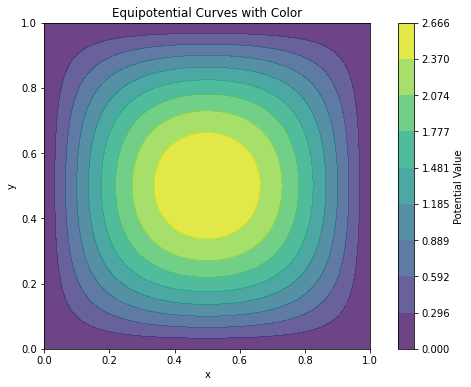

In [181]:
# Choose a set of constant potential values
constant_potentials = np.linspace(np.min(Z), np.max(Z), 10)

# Plot the equipotential curves with color
plt.figure(figsize=(10, 6))
contourf = plt.contourf(X, Y, Z, levels=constant_potentials, cmap='viridis', alpha=0.8)
plt.colorbar(contourf, label='Potential Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Equipotential Curves with Color')
plt.gca().set_aspect('equal')
plt.show()



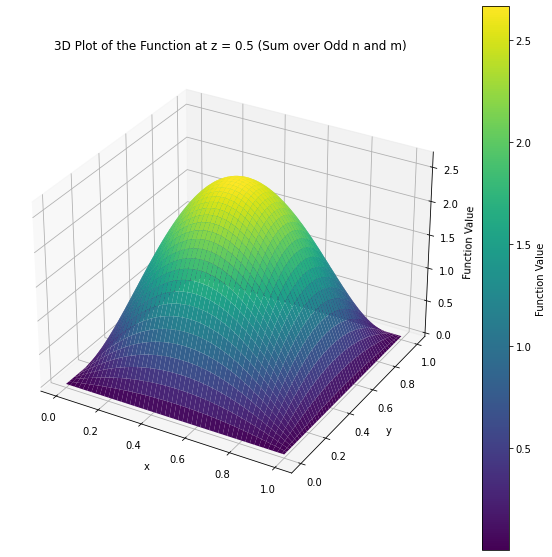

In [162]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the coordinates for the surface
X, Y = np.meshgrid(x, y)
Z = Z.reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a colorbar
fig.colorbar(surf, label='Function Value')

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')

# Set the title
ax.set_title(f'3D Plot of the Function at z = {z_constant} (Sum over Odd n and m)')

# Display the plot
plt.show()

Ploteo el campo eléctrico.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5568\2331427402.py:34: RuntimeWarning: invalid value encountered in true_divide
  E_normalized_x = Ex / E_magnitude
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5568\2331427402.py:35: RuntimeWarning: invalid value encountered in true_divide
  E_normalized_y = Ey / E_magnitude
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5568\2331427402.py:39: RuntimeWarning: invalid value encountered in sqrt
  color = np.sqrt(((Ex-n)/2)*2 + ((Ey-n)/2)*2)


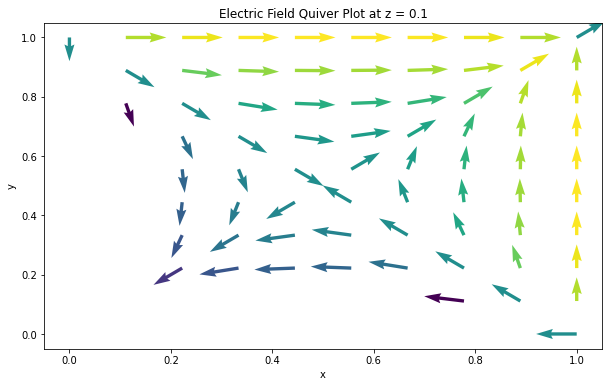

In [163]:
# Calculate the gradient of the potential to get the electric field components
a = 1.0
b = 1.0
c = 1.0
V = 16
A = 16*V/np.pi**2


x = np.linspace(0, a, 10)
y = np.linspace(0, b, 10)
X, Y = np.meshgrid(x, y)

# Choose a constant value of z for the density plot (between 0 and c)
z_constant = 0.1

# Calculate the function values for the given z
n_values = np.arange(1, 100, 2)  # Odd values of n
m_values = np.arange(1, 100, 2)  # Odd values of m
Z = np.zeros_like(X)

for n in n_values:
    for m in m_values:
        kn = n * np.pi / a
        km = m * np.pi / b
        gamma = np.sqrt(kn**2 + km**2)
        Z += A*(1 / (n * m)) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b) * \
             np.sinh(gamma * (c - z_constant)) / np.sinh(gamma * c)

Ex, Ey = np.gradient(-Z,x,y)


# Normalize the electric field vectors
E_magnitude = np.sqrt(Ex**2 + Ey**2)
E_normalized_x = Ex / E_magnitude
E_normalized_y = Ey / E_magnitude
n = -20

# Defining color
color = np.sqrt(((Ex-n)/2)*2 + ((Ey-n)/2)*2)

# Set a constant length for all arrows
arrow_length = 0.08

# Scale the normalized vectors to the constant length
E_scaled_x = E_normalized_x * arrow_length
E_scaled_y = E_normalized_y * arrow_length

# Create a quiver plot to visualize the electric field vectors
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, E_scaled_x, E_scaled_y, color, angles='xy', scale_units='xy', scale=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Electric Field Quiver Plot at z = {z_constant}')
plt.show()

<h3>Carga puntual dentro de caja a tierra</h3>

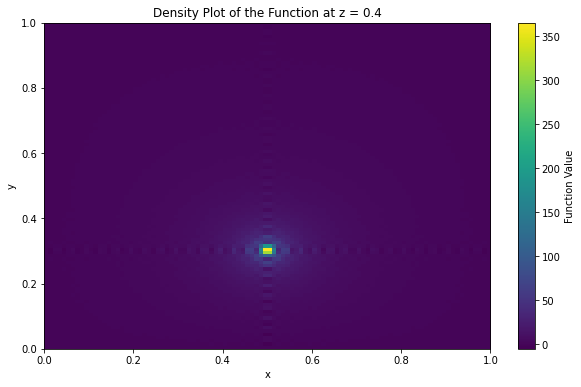

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
a = 1.0
b = 1.0
c = a

x0 = 0.5
y0 = 0.3
z0 = 0.4

q = 1
A = 16*q*np.pi/a**2

#Truncado de la sumatoria en N y M
N = 60
M = 60

# Create a grid of x and y values
x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)

# Choose a constant value of z for the density plot (between 0 and c)
z_constant = 0.4

# Calculate the function values for the given z
n_values = np.arange(1, N, 1)  
m_values = np.arange(1, M, 1)  
Z = np.zeros_like(X)

for n in n_values:
    for m in m_values:
        kn = n * np.pi / a
        km = m * np.pi / b
        gamma = np.sqrt(kn**2 + km**2)
        Z += A*np.sin(n*np.pi*x0/a)*np.sin(m*np.pi*y0/b)*np.sin(n*np.pi*X/a)*np.sin(m*np.pi*Y/b)/(gamma*np.sinh(gamma*a))*(np.sinh(gamma*z_constant)*np.sinh(gamma*(c-z0))+np.sinh(gamma*(c-z_constant))*np.sinh(gamma*z0))

# Create a density plot
plt.figure(figsize=(10, 6))
density_plot = plt.imshow(Z, extent=(0, a, 0, b), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(density_plot, label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Density Plot of the Function at z = {z_constant}')
plt.show()

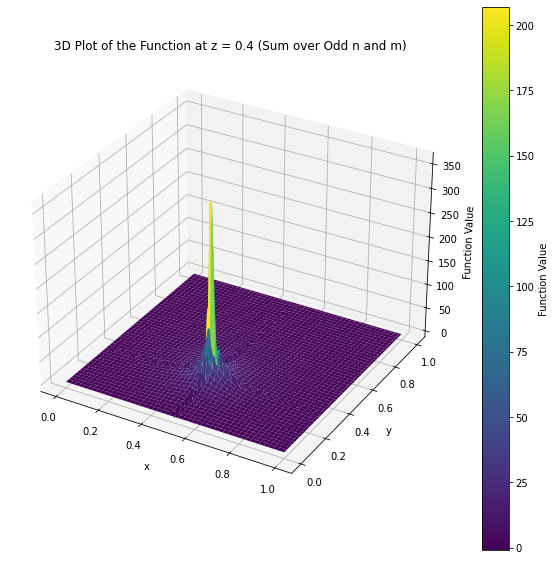

In [186]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the coordinates for the surface
X, Y = np.meshgrid(x, y)
Z = Z.reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a colorbar
fig.colorbar(surf, label='Function Value')

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')

# Set the title
ax.set_title(f'3D Plot of the Function at z = {z_constant} (Sum over Odd n and m)')

# Display the plot
plt.show()


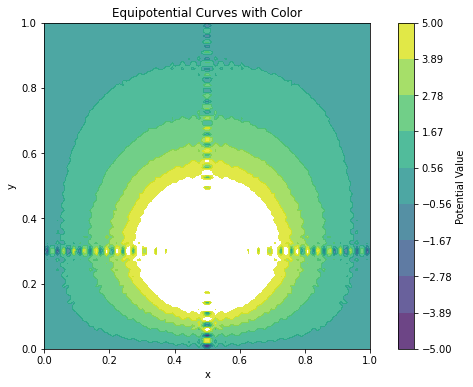

In [191]:
# Choose a set of constant potential values
constant_potentials = np.linspace(-5, 5, 10)

# Plot the equipotential curves with color
plt.figure(figsize=(10, 6))
contourf = plt.contourf(X, Y, Z, levels=constant_potentials, cmap='viridis', alpha=0.8)
plt.colorbar(contourf, label='Potential Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Equipotential Curves with Color')
plt.gca().set_aspect('equal')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5568\3290075054.py:6: RuntimeWarning: invalid value encountered in true_divide
  E_normalized_x = Ex / E_magnitude
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5568\3290075054.py:7: RuntimeWarning: invalid value encountered in true_divide
  E_normalized_y = Ey / E_magnitude
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5568\3290075054.py:11: RuntimeWarning: invalid value encountered in sqrt
  color = np.sqrt(((Ex-n)/2)*2 + ((Ey-n)/2)*2)


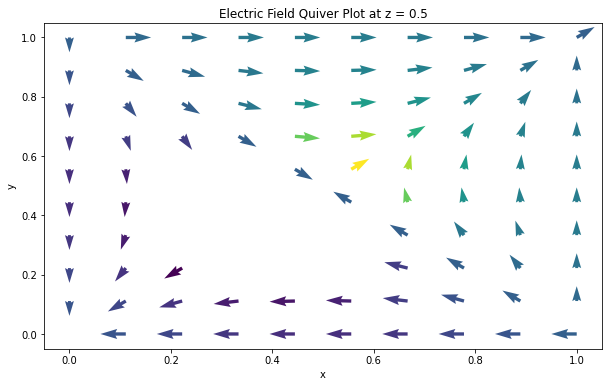

In [194]:
Ex, Ey = np.gradient(-Z,x,y)


# Normalize the electric field vectors
E_magnitude = np.sqrt(Ex**2 + Ey**2)
E_normalized_x = Ex / E_magnitude
E_normalized_y = Ey / E_magnitude
n = -10

# Defining color
color = np.sqrt(((Ex-n)/2)*2 + ((Ey-n)/2)*2)




# Set a constant length for all arrows
arrow_length = 0.05

# Scale the normalized vectors to the constant length
E_scaled_x = E_normalized_x * arrow_length
E_scaled_y = E_normalized_y * arrow_length

# Create a quiver plot to visualize the electric field vectors
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, E_scaled_x, E_scaled_y, color, angles='xy', scale_units='xy', scale=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Electric Field Quiver Plot at z = {z_constant}')
plt.show()


<h3>Carga puntual dentro de paralelepípedo semi-infinito a tierra</h3>

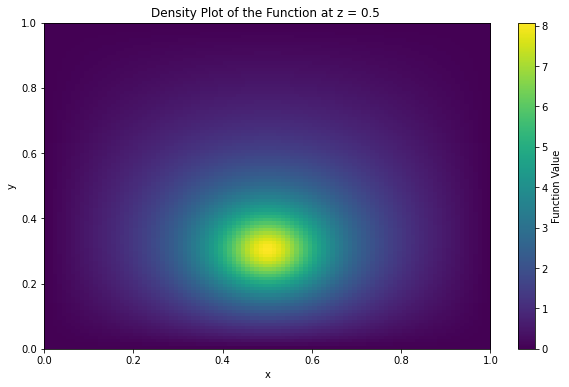

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
a = 1.0
b = a

x0 = 0.5
y0 = 0.3
z0 = 0.4

q = 1
A = 8*q/a

#Truncado de la sumatoria en N y M
N = 60
M = 60

# Create a grid of x and y values
x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)

# Choose a constant value of z for the density plot (between 0 and c)
z_constant = 0.5

# Calculate the function values for the given z
n_values = np.arange(1, N, 1)  
m_values = np.arange(1, M, 1)  
Z = np.zeros_like(X)

for n in n_values:
    for m in m_values:
        kn = n * np.pi / a
        km = m * np.pi / b
        Z += A*np.sin(n*np.pi*x0/a)*np.sin(m*np.pi*y0/a)*np.sin(n*np.pi*X/a)*np.sin(m*np.pi*Y/b)*np.exp(-np.pi/a*np.sqrt(n**2+m**2)*abs(z_constant-z0))/np.sqrt(n**2+m**2)

# Create a density plot
plt.figure(figsize=(10, 6))
density_plot = plt.imshow(Z, extent=(0, a, 0, b), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(density_plot, label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Density Plot of the Function at z = {z_constant} ')
plt.show()

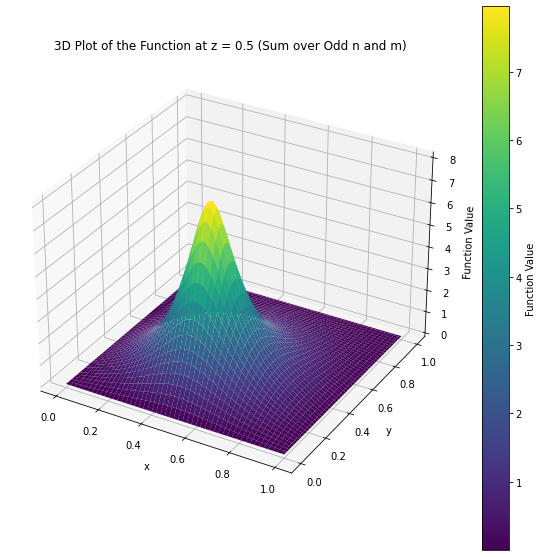

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the coordinates for the surface
X, Y = np.meshgrid(x, y)
Z = Z.reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a colorbar
fig.colorbar(surf, label='Function Value')

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')

# Set the title
ax.set_title(f'3D Plot of the Function at z = {z_constant} (Sum over Odd n and m)')

# Display the plot
plt.show()

<h1>Separación de variables en esféricas</h1>

A continuación, grafico el potencial debido a un anillo cargado uniformemente, de radio $d$, dentro de una esfera conductora a tierra, hueca, de radio $b$

$$\Phi(r,\phi,\phi) = Q\sum_{n=0}^\infty \frac{(-1)^n(2n+1)!}{2^n n!}P_{2n}(\cos \phi)r_{<}^{2n}(\frac{1}{r^{2n+1}_{>}}-\frac{r^{2n}_{>}}{b^{2n+1}}) $$

In [8]:
# Importamos NumPy, Matplotlib, y las funciones especiales de SciPy
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

In [9]:
# Definimos las variables relevantes del problema (en unidades adimensionales)
Q = 1.     # carga total en el anillo uniformemente cargado
b = 1.     # radio de la esfera
d = .5*b   # radio del anillo (debe ser menor que b)
n_max = 50 # número de términos a considerar en la suma

In [10]:
# Definimos una función que devuelva el valor del potencial en un punto. Usamos un bucle para hacer la suma:
def psi(r,theta):
    suma = 0.                      # inicializamos la variable out a cero
    for n in range(0,n_max+1):    # sumamos sobre todos los términos hasta n_max
        rmin = np.minimum(r,d)
        rmax = np.maximum(r,d)
        suma += Q*(-1)**n*factorial2(2*n-1)/(2**n*factorial(n))*lpmv(0,2*n,np.cos(theta))*rmin**(2*n)*(1/rmax**(2*n+1)-rmax**(2*n)/b**(4*n+1))
    return suma

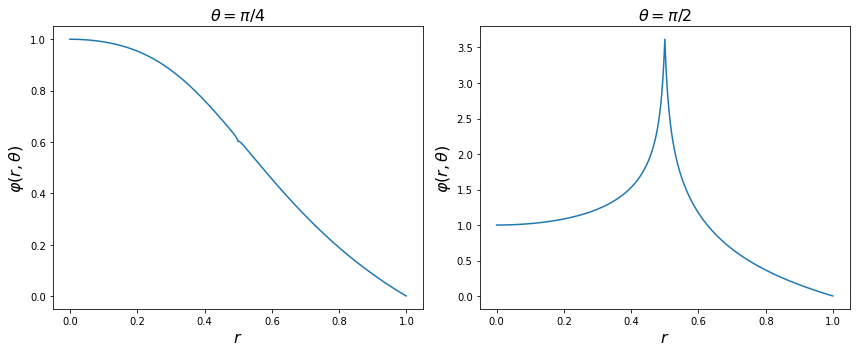

In [11]:
# Graficamos cortes del potencial en función de r para diferentes valores de theta:
r = np.arange(0,b,.001)   # generamos un vector con r entre 0 y b, con paso de 0.001

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
theta = np.pi/4
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = \pi/4$',fontsize=16)
plt.tight_layout()
plt.subplot(1, 2, 2)
theta = np.pi/2
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = \pi/2$',fontsize=16)
plt.tight_layout()
plt.show()

Finalmente, graficamos cortes con el valor del potencial en el plano (r,theta) en coordenadas polares. Para eso tenemos que generar una malla 2D con los valores de los pares de coordenadas usando el comando "meshgrid", a partir de vectores que tengan los valores lineales de r y theta:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5568\4093949113.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')


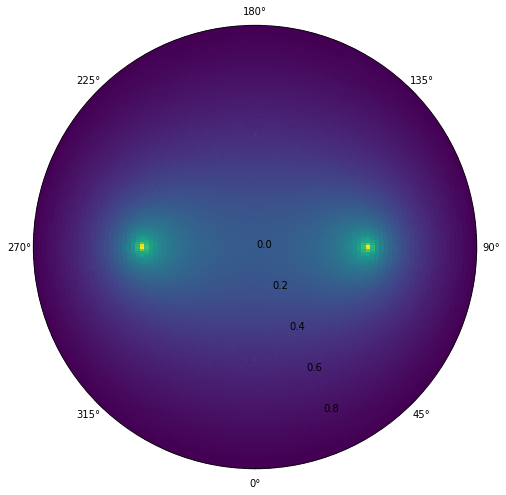

In [12]:
# Miramos todo el plano (r,theta); generamos vectores con los valores de r y theta, y la malla 2D:
r     = np.arange(0,b,.02)
theta = np.arange(0,2*np.pi,.02)
tmesh,rmesh = np.meshgrid(theta,r)

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111,polar='True')
ax.set_theta_offset(-np.pi/2)
plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')
plt.tight_layout()
plt.show()

<h1>Potencial de carga puntual en esféricas</h1>

$$Phi(r) = \sum_{l=0}^\infty q \sqrt{\frac{4\pi}{2l+1}}\frac{r^l_<}{r^{l+1}_>}P_l(\cos \theta)$$

In [162]:
# Importamos NumPy, Matplotlib, y las funciones especiales de SciPy
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

In [163]:
# Definimos las variables relevantes del problema (en unidades adimensionales)
q = 1.     # carga total en el anillo uniformemente cargado
d = 1
n_max = 150 # número de términos a considerar en la suma

In [164]:
# Definimos una función que devuelva el valor del potencial en un punto. Usamos un bucle para hacer la suma:
def psi(r,theta):
    suma = 0.                      # inicializamos la variable out a cero
    for n in range(0,n_max+1):    # sumamos sobre todos los términos hasta n_max
        rmin = np.minimum(r,d)
        rmax = np.maximum(r,d)
        suma += q*np.sqrt(4*np.pi/(2*n+1))*rmin**n/rmax**(n+1)*lpmv(0,n,np.cos(theta))
    return suma

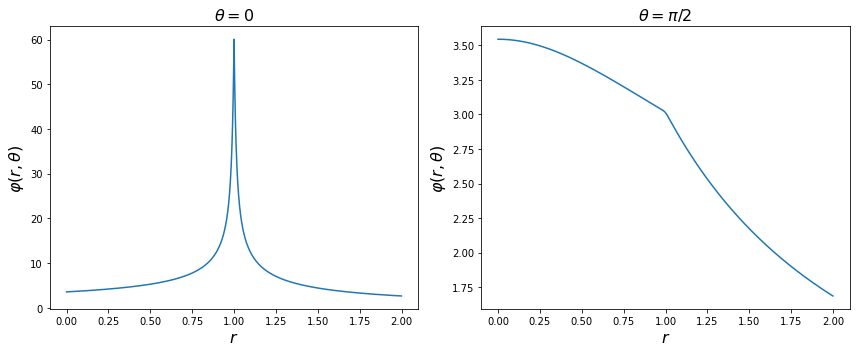

In [169]:
# Graficamos cortes del potencial en función de r para diferentes valores de theta:
r = np.arange(0,2*d,.001)   # generamos un vector con r entre 0 y b, con paso de 0.001

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
theta = 0
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = 0$',fontsize=16)
plt.tight_layout()


plt.subplot(1, 2, 2)
theta = np.pi/2
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = \pi/2$',fontsize=16)
plt.tight_layout()


plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5944\1227528545.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')


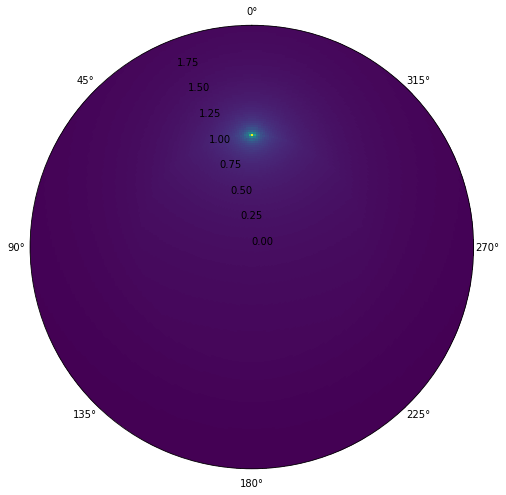

In [171]:
# Miramos todo el plano (r,theta); generamos vectores con los valores de r y theta, y la malla 2D:
r     = np.arange(0,2*d,.02)
theta = np.arange(0,2*np.pi,.02)
tmesh,rmesh = np.meshgrid(theta,r)

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111,polar='True')
ax.set_theta_offset(np.pi/2)
plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')
plt.tight_layout()
plt.show()

El problema de dos casquetes semiesféricos a potenciales $V_1$ y $V2$, ambos formando un único casquetes esférico:

$$\Phi(r,\theta,\phi)=\frac{R(V_1+V_2)}{2r_>}+\frac{V_1-V_2}{2}\sum_{l=1}^\infty (-1)^{\frac{l-1}{2}}(2l+1)\frac{(l-2)!!}{(l+1)!!}\frac{Rr^l_<}{r^{l+1}_>}P_l(\cos \theta)$$

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

In [172]:
R = 1
V1 = 0
V2 = 1
n_max = 150 # número de términos a considerar en la suma

In [173]:
# Definimos una función que devuelva el valor del potencial en un punto. Usamos un bucle para hacer la suma:
def psi(r,theta):
    suma = 0.                      # inicializamos la variable out a cero
    for n in range(1,n_max+1,2):    # sumamos sobre todos los términos hasta n_max
        rmin = np.minimum(r,R)
        rmax = np.maximum(r,R)
        suma += (V1-V2)/2*(-1)**((n-1)/2)*(2*n+1)*factorial2(n-2)/factorial2(n+1)*lpmv(0,n,np.cos(theta))*R*rmin**n/rmax**(n+1)
    return (suma+1/2*R*(V1+V2)/rmax)

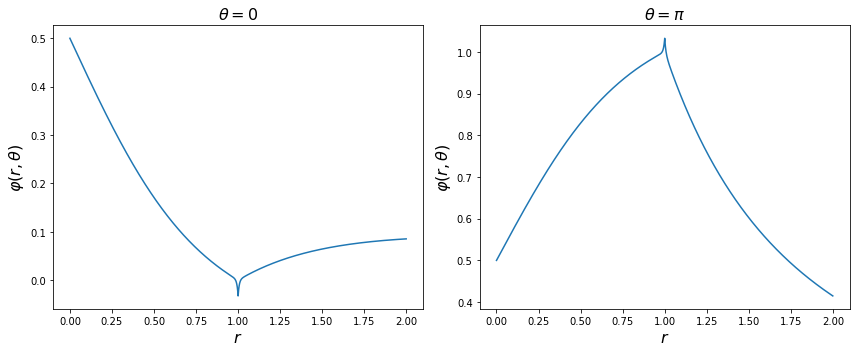

In [174]:
# Graficamos cortes del potencial en función de r para diferentes valores de theta:
r = np.arange(0,2*R,.001)   # generamos un vector con r entre 0 y b, con paso de 0.001

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
theta = 0
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = 0$',fontsize=16)
plt.tight_layout()


plt.subplot(1, 2, 2)
theta = pi
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = \pi$',fontsize=16)
plt.tight_layout()


plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5944\2997501147.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')


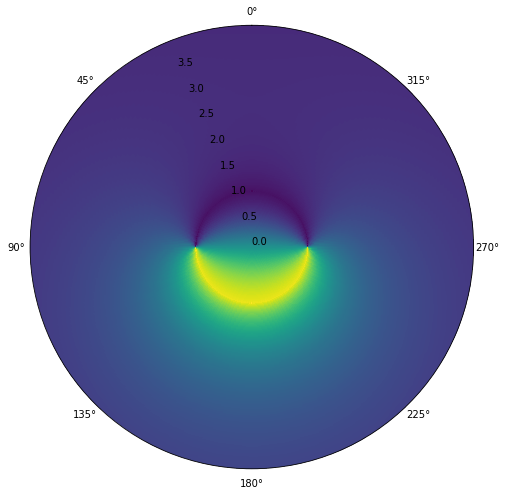

In [177]:
# Miramos todo el plano (r,theta); generamos vectores con los valores de r y theta, y la malla 2D:
r = np.arange(0,4*R,.02)
theta = np.arange(0,2*np.pi,.02)
tmesh,rmesh = np.meshgrid(theta,r)

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111,polar='True')
ax.set_theta_offset(np.pi/2)
plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')
plt.tight_layout()
plt.show()

Problema del casquete con densidad de carga superficial $\sigma(\theta) = \sigma_0 \cos(\theta)$:

$$\Phi(r,\theta,\phi) = \frac{4\pi R^2}{3}\sigma_0 \frac{r_<}{r^2_>}\cos\theta $$

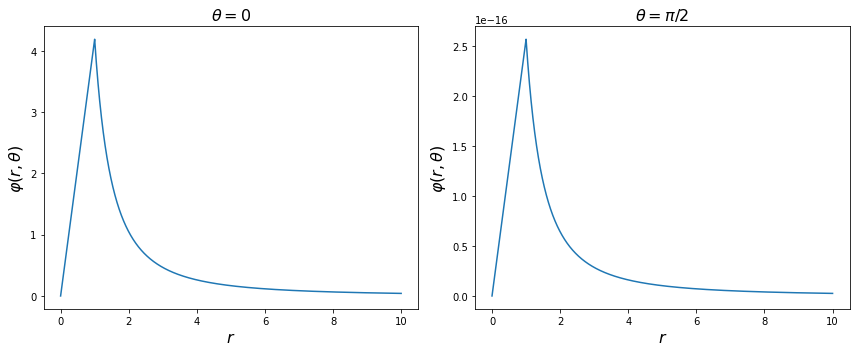

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

sigma0 = 1
R = 1

def psi(r,theta):
    rmin = np.minimum(r,R)
    rmax = np.maximum(r,R)
    psi = 4/3*np.pi*R**2*sigma0*rmin/rmax**2*np.cos(theta)
    return psi

r = np.arange(0,10*R,.001)   # generamos un vector con r entre 0 y b, con paso de 0.001

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
theta = 0
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = 0$',fontsize=16)
plt.tight_layout()


plt.subplot(1, 2, 2)
theta = np.pi/2
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = \pi/2$',fontsize=16)
plt.tight_layout()


plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5944\1265366794.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')


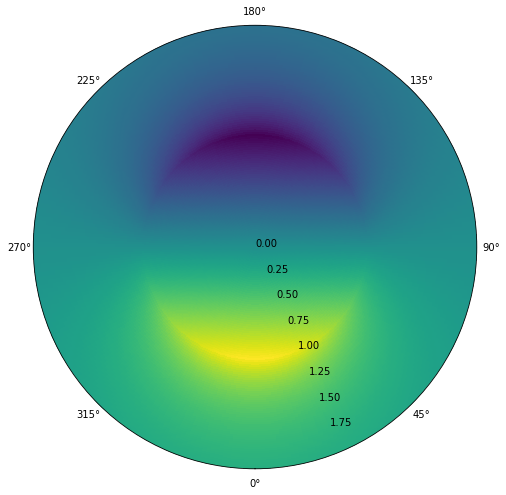

In [120]:
# Miramos todo el plano (r,theta); generamos vectores con los valores de r y theta, y la malla 2D:
r     = np.arange(0,2*R,.02)
theta = np.arange(0,2*np.pi,.02)
tmesh,rmesh = np.meshgrid(theta,r)

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111,polar='True')
ax.set_theta_offset(-np.pi/2)
plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')
plt.tight_layout()
plt.show()

---------
<h1>Carga puntual dentro de cilindro conductor a tierra</h1>

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11176\1659712816.py:42: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(tmesh, rmesh, potential_values, shading='auto')


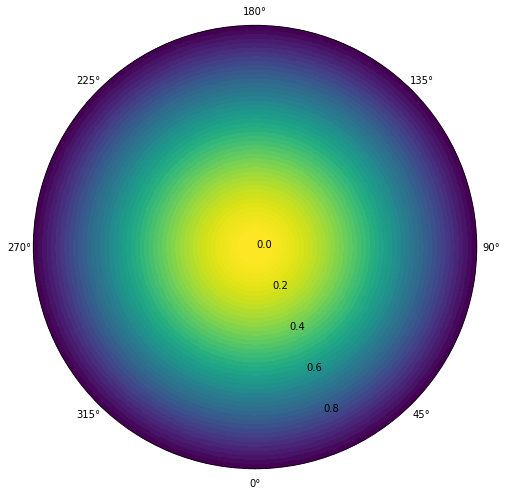

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

q = 1.0
a = 1.0
L = 5.0
n_max = 10
m_max = 10
z0 = 2
phi0 = 0.0
rho0 = 0.0
N = 20

xmn = np.zeros((N, N))

def psi(rho, phi, z):
    suma = 0.0
    for n in range(1, n_max + 1):
        for m in range(0, m_max):
            xmn[n][m] = n * np.pi + (m - 0.5) * np.pi / 2
            zmin = np.minimum(z, z0)
            Zmax = np.maximum(z, z0)
            suma += (8*q / a) * (
                np.cos(m*(phi-phi0))
                * jv(m, xmn[n][m] * rho / a)
                * jv(m,xmn[n][m] * rho0 / a)
                / (xmn[n][m] * jv(m + 1, xmn[n][m]) ** 2 * np.sinh(xmn[n][m] * L / a))
            ) * np.sinh(xmn[n][m] * zmin / a) * np.sinh(xmn[n][m] * (L - Zmax) / a)
    return suma 

r = np.arange(0, a, 0.02)
theta = np.arange(0, 2 * np.pi, 0.02)
tmesh, rmesh = np.meshgrid(theta, r)

Z_FIXED = 3.5  # Choose the fixed z value for the potential plot
potential_values = np.vectorize(lambda r, theta: psi(r, theta, Z_FIXED))(rmesh, tmesh)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(-np.pi / 2)
plt.pcolormesh(tmesh, rmesh, potential_values, shading='auto')
plt.tight_layout()
plt.show()

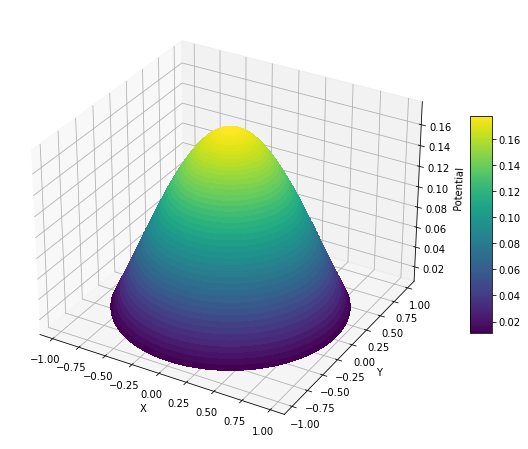

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D toolkit

# Your existing code ...

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Convert polar coordinates to Cartesian coordinates
X = rmesh * np.cos(tmesh)
Y = rmesh * np.sin(tmesh)
Z = np.ones_like(X) * Z_FIXED

# Plot the 3D surface
surface = ax.plot_surface(X, Y, potential_values, cmap='viridis', linewidth=0, antialiased=False)

# Add color bar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')

plt.show()
